## Wine quality prediction 

Problem statement - To predict the quality of wine based on the given features

#### package imports

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [150]:
df = pd.read_csv('/Users/fllap0258/Personal/Wine Quality Prediction/winequality-red.csv')

#### Size of Dataset

In [3]:
df.shape

(1599, 12)

#### Column names

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Target distribution

In [5]:
df.quality.value_counts(normalize=True, ascending=True)

3    0.006254
8    0.011257
4    0.033146
7    0.124453
6    0.398999
5    0.425891
Name: quality, dtype: float64

#### Data types of the features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

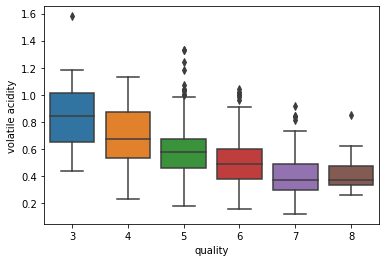

In [8]:
sns.boxplot(x='quality', y='volatile acidity', data=df)

The Feature volatile acidity is showing a distinction between all the quality grades of the wine. But there are a few outliers that need to be handled at the preprocessing stage.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

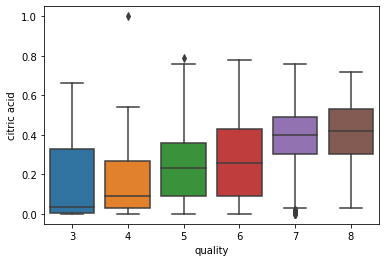

In [38]:
sns.boxplot(x ='quality', y='citric acid', data=df)

The feature citric acid shows an increasing in levels of citric acid improves the quality of the wine. But it should be noted that the values for quality 3 is highly skewed. Outliers in quality 4 needs to be handled.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

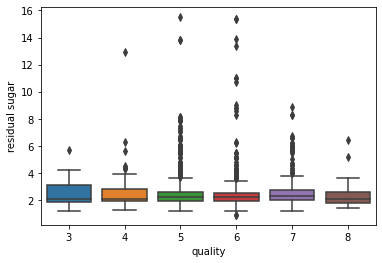

In [39]:
sns.boxplot(x ='quality', y='residual sugar', data=df)

The feature residual sugar has a larnge number of outliers.

In [40]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

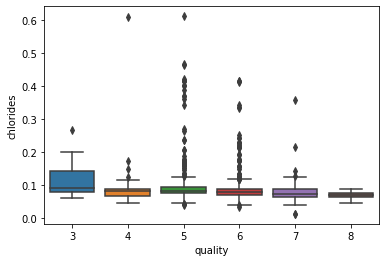

In [41]:
sns.boxplot(x ='quality', y='chlorides', data=df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

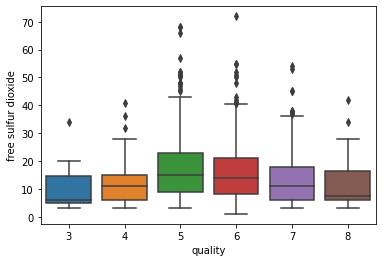

In [42]:
sns.boxplot(x ='quality', y='free sulfur dioxide', data=df)

<AxesSubplot:xlabel='quality', ylabel='density'>

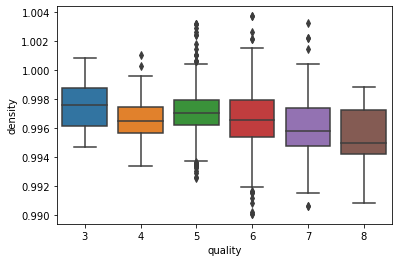

In [43]:
sns.boxplot(x ='quality', y='density', data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

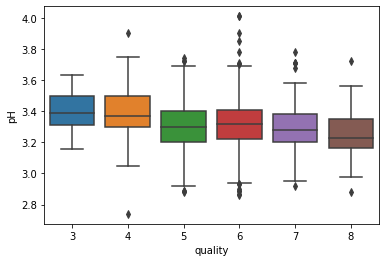

In [44]:
sns.boxplot(x ='quality', y='pH', data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

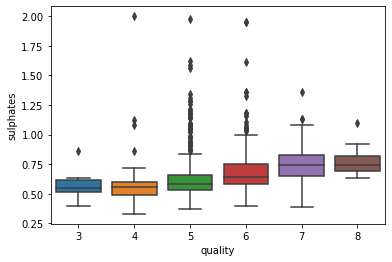

In [45]:
sns.boxplot(x ='quality', y='sulphates', data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

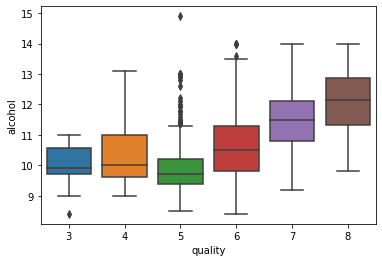

In [46]:
sns.boxplot(x ='quality', y='alcohol', data=df)

In [49]:
corr = df.corr()

<AxesSubplot:>

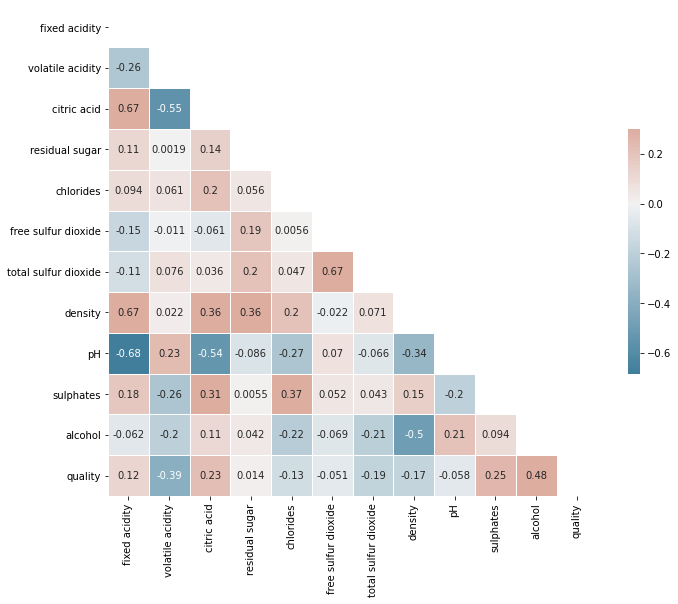

In [51]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

As the correlation values are not greater than 0.8 on both +ve and -ve scale, we can say that there does not exist multicolliniearity.

In [60]:
df[df['volatile acidity']>=1.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1299,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3


In [62]:
df[df['citric acid']>=0.8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


### Outlier detection

In [24]:
def check_outlier_IQR(df):
    for i in df.columns:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        df_final=df[~((df[i]<(Q1-1.5*IQR)) | (df[i]>(Q3+1.5*IQR)))]
        count_outliers = df.shape[0]-df_final.shape[0]
        st = i+" : "+str(count_outliers)+'\n'
        print(st)

In [25]:
check_outlier_IQR(df)

fixed acidity : 49

volatile acidity : 19

citric acid : 1

residual sugar : 155

chlorides : 112

free sulfur dioxide : 30

total sulfur dioxide : 55

density : 45

pH : 35

sulphates : 59

alcohol : 13

quality : 28



In [126]:
df_outlier_removed = df.copy()

- Removing outlier from citric acid as it has high correlation with the target.
- Removing residual sugar and chlorides as the count of outlier is high.

In [127]:
df_outlier_removed = df[df['citric acid']<=0.8]

In [93]:
df_outlier_removed.drop(['residual sugar', 'chlorides'], axis=1, inplace=True)

/Users/fllap0258/environments/personal_projects/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [94]:
df_outlier_removed.shape

(1598, 10)

In [138]:
df['quality'] = df.quality.apply(lambda x: 1 if x >= 7 else 0)

In [96]:
def split_features_target(df, column_name):
    target = df[column_name]
    df.drop([column_name], axis=1, inplace=True)
    return df, target

In [139]:
features, target = split_features_target(df, 'quality')

### Base line model

In [36]:
from sklearn.model_selection import train_test_split

In [143]:
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [141]:
features_scaled = StandardScaler().fit_transform(features)

In [142]:
x_train, x_test, y_train ,y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=1)

In [144]:
decision_tree_clf = DecisionTreeClassifier(max_depth=4, random_state=4)


In [145]:
decision_tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=4)

In [146]:
test_labels = decision_tree_clf.predict(x_test)

In [147]:
print(classification_report(y_test, test_labels))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       288
           1       0.42      0.47      0.44        32

    accuracy                           0.88       320
   macro avg       0.68      0.70      0.69       320
weighted avg       0.89      0.88      0.88       320



### Effect of handling outliers

- citric acid
- density
- pH

Why these ?
Because these features have higher correlation with the target variable

In [157]:
df_copy = df.copy()

In [152]:
df_outlier_removed = df_copy[df_copy['citric acid']<=0.8]

In [153]:
df_outlier_removed['quality'] = df_outlier_removed.quality.apply(lambda x: 1 if x >= 7 else 0)

<ipython-input-153-62840cd48241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier_removed['quality'] = df_outlier_removed.quality.apply(lambda x: 1 if x >= 7 else 0)


In [154]:
features, target = split_features_target(df_outlier_removed, 'quality')

/Users/fllap0258/environments/personal_projects/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [155]:
features_scaled = StandardScaler().fit_transform(features)

x_train, x_test, y_train ,y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=1)

decision_tree_clf = DecisionTreeClassifier(max_depth=4, random_state=4)
decision_tree_clf.fit(x_train, y_train)

test_labels = decision_tree_clf.predict(x_test)
print(classification_report(y_test, test_labels))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       279
           1       0.65      0.49      0.56        41

    accuracy                           0.90       320
   macro avg       0.79      0.72      0.75       320
weighted avg       0.89      0.90      0.89       320



- As we can see, by removing 1 unusual data point, we have improved the precision of the same model by 20%

In [158]:
## density and pH

In [168]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3-Q1
    df_wo_outliers = df[(df[column_name]>(Q1-IQR*1.5))&(df[column_name]<(Q3+IQR*1.5))] 
    return df_wo_outliers

In [169]:
df_copy.shape

(1599, 12)

In [170]:
df_outliers_removed = remove_outliers(df_copy, 'citric acid')
df_outliers_removed.shape

(1598, 12)

In [171]:
df_outliers_removed = remove_outliers(df_outliers_removed, 'density')
df_outliers_removed.shape

(1553, 12)

In [172]:
df_outliers_removed = remove_outliers(df_outliers_removed, 'pH')
df_outliers_removed.shape

(1528, 12)

In [175]:
df_outliers_removed['quality'] = df_outliers_removed.quality.apply(lambda x: 1 if x >= 7 else 0)

In [177]:
features, target = split_features_target(df_outliers_removed, 'quality')

In [178]:
features_scaled = StandardScaler().fit_transform(features)

x_train, x_test, y_train ,y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=1)

decision_tree_clf = DecisionTreeClassifier(max_depth=4, random_state=4)
decision_tree_clf.fit(x_train, y_train)

test_labels = decision_tree_clf.predict(x_test)
print(classification_report(y_test, test_labels))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       259
           1       0.61      0.36      0.45        47

    accuracy                           0.87       306
   macro avg       0.75      0.66      0.69       306
weighted avg       0.85      0.87      0.85       306



- As we can see, that the metrics have decreased.
- Hence, we can say that removing these data points have removed some valuable datapoints

In [181]:
## volatile acidity

In [182]:
df_outliers_removed_2 = remove_outliers(df_copy, 'citric acid')
df_outliers_removed_2.shape

(1598, 12)

In [186]:
df_outliers_removed_2 = df_outliers_removed_2[df_outliers_removed_2['volatile acidity']<1.5]

In [187]:
df_outliers_removed_2.shape

(1597, 12)

In [188]:
df_outliers_removed_2['quality'] = df_outliers_removed_2.quality.apply(lambda x: 1 if x >= 7 else 0)

In [189]:
features, target = split_features_target(df_outliers_removed_2, 'quality')

In [190]:
features_scaled = StandardScaler().fit_transform(features)

x_train, x_test, y_train ,y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=1)

decision_tree_clf = DecisionTreeClassifier(max_depth=4, random_state=4)
decision_tree_clf.fit(x_train, y_train)

test_labels = decision_tree_clf.predict(x_test)
print(classification_report(y_test, test_labels))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       277
           1       0.67      0.33      0.44        43

    accuracy                           0.89       320
   macro avg       0.78      0.65      0.69       320
weighted avg       0.87      0.89      0.87       320



In [191]:
## alcohol

In [199]:
df_outliers_removed_2 = remove_outliers(df_copy, 'citric acid')
df_outliers_removed_2.shape

(1598, 12)

In [200]:
df_outliers_removed_2=df_outliers_removed_2[df_outliers_removed_2['alcohol']<14]
df_outliers_removed_2=df_outliers_removed_2[df_outliers_removed_2['volatile acidity']<1.5]

In [201]:
df_outliers_removed_2['quality'] = df_outliers_removed_2.quality.apply(lambda x: 1 if x >= 7 else 0)

In [202]:
features, target = split_features_target(df_outliers_removed_2, 'quality')

In [203]:
features_scaled = StandardScaler().fit_transform(features)

x_train, x_test, y_train ,y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=1)

decision_tree_clf = DecisionTreeClassifier(max_depth=4, random_state=4)
decision_tree_clf.fit(x_train, y_train)

test_labels = decision_tree_clf.predict(x_test)
print(classification_report(y_test, test_labels))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       274
           1       0.77      0.45      0.57        44

    accuracy                           0.91       318
   macro avg       0.84      0.72      0.76       318
weighted avg       0.90      0.91      0.90       318



- Once we have removed outliers from citric acid, volatile acidity and alcohol, the metrics improved significantly

In [205]:
### Changing the ML models.

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [212]:
df_outliers_removed_2 = remove_outliers(df_copy, 'citric acid')
df_outliers_removed_2.shape

(1598, 12)

In [213]:
df_outliers_removed_2=df_outliers_removed_2[df_outliers_removed_2['alcohol']<14]
df_outliers_removed_2=df_outliers_removed_2[df_outliers_removed_2['volatile acidity']<1.5]

In [214]:
df_outliers_removed_2['quality'] = df_outliers_removed_2.quality.apply(lambda x: 1 if x >= 7 else 0)

In [215]:
features, target = split_features_target(df_outliers_removed_2, 'quality')

In [216]:
features_scaled = StandardScaler().fit_transform(features)

x_train, x_test, y_train ,y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=1)

lgc = LogisticRegression()
lgc.fit(x_train, y_train)

test_labels = lgc.predict(x_test)
print(classification_report(y_test, test_labels))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       274
           1       0.58      0.25      0.35        44

    accuracy                           0.87       318
   macro avg       0.73      0.61      0.64       318
weighted avg       0.85      0.87      0.85       318



In [228]:
rfm = RandomForestClassifier(random_state=4)
rfm.fit(x_train, y_train)

test_labels = rfm.predict(x_test)
print(classification_report(y_test, test_labels))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       274
           1       0.68      0.30      0.41        44

    accuracy                           0.88       318
   macro avg       0.79      0.64      0.67       318
weighted avg       0.87      0.88      0.86       318



In [239]:
### Hyperparameter tuning

In [240]:
from sklearn.model_selection import GridSearchCV

In [261]:
md = [4,5,6,7,8,9,10,11,12,13]

In [242]:
df_outliers_removed_2 = remove_outliers(df_copy, 'citric acid')
df_outliers_removed_2.shape

(1598, 12)

In [243]:
f_outliers_removed_2=df_outliers_removed_2[df_outliers_removed_2['alcohol']<14]
df_outliers_removed_2=df_outliers_removed_2[df_outliers_removed_2['volatile acidity']<1.5]

In [244]:
df_outliers_removed_2['quality'] = df_outliers_removed_2.quality.apply(lambda x: 1 if x >= 7 else 0)

In [245]:
features, target = split_features_target(df_outliers_removed_2, 'quality')

In [247]:
features_scaled = StandardScaler().fit_transform(features)

x_train, x_test, y_train ,y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=1)


In [262]:
gsc = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=4),
    param_grid={
        'max_depth':md
    },
    scoring='recall'

)
grid_result = gsc.fit(x_train, y_train)


In [263]:
df_result = pd.DataFrame({'score':grid_result.cv_results_['mean_test_score'],
                          'max_depth':md
                         })

<AxesSubplot:xlabel='max_depth'>

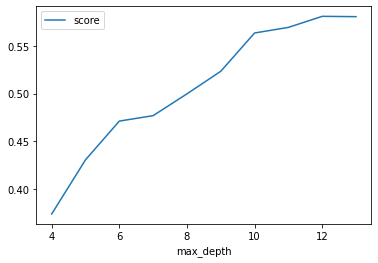

In [264]:
df_result.plot(x='max_depth')

In [265]:
min_split_list = [2,3,4,5]

In [266]:
gsc = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=4, max_depth=10),
    param_grid={
        'min_samples_split':min_split_list
    },
    scoring='recall'

)
grid_result = gsc.fit(x_train, y_train)


<AxesSubplot:xlabel='min_samples_split'>

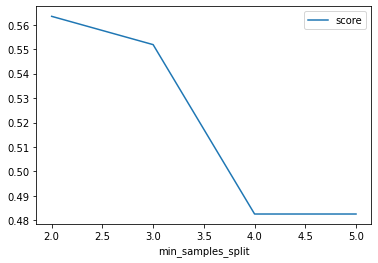

In [267]:
df_result = pd.DataFrame({'score':grid_result.cv_results_['mean_test_score'],
                          'min_samples_split':min_split_list
                         })
df_result.plot(x='min_samples_split')

In [268]:
min_sample_leaf_list = [1,2,3,4]

In [273]:
gsc = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=4, max_depth=10, min_samples_split=2),
    param_grid={
        'min_samples_leaf':min_sample_leaf_list
    },
    scoring='recall'

)
grid_result = gsc.fit(x_train, y_train)


<AxesSubplot:xlabel='min_samples_leaf'>

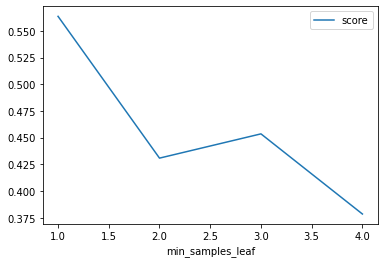

In [275]:
df_result = pd.DataFrame({'score':grid_result.cv_results_['mean_test_score'],
                          'min_samples_leaf':min_sample_leaf_list
                         })
df_result.plot(x='min_samples_leaf')

In [282]:
decision_tree_clf = DecisionTreeClassifier(max_depth=13, random_state=4)
decision_tree_clf.fit(x_train, y_train)

test_labels = decision_tree_clf.predict(x_test)
print(classification_report(y_test, test_labels))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       277
           1       0.72      0.53      0.61        43

    accuracy                           0.91       320
   macro avg       0.82      0.75      0.78       320
weighted avg       0.90      0.91      0.90       320



## Best Results.
- This Model can be used to detect the bad wine quality samples.